<a href="https://colab.research.google.com/github/teknas777/Exploratory-Data-Analysis/blob/main/Paisabazaar_Banking_Fraud_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Paisabazaar Banking Fraud Analysis**

### Problem Statement

Paisabazaar aims to enhance its credit assessment process by accurately classifying customers' credit scores based on financial and behavioral data. Currently, traditional credit evaluation methods may not fully capture individual creditworthiness, leading to potential inefficiencies in loan approvals and risk management. By leveraging customer data—such as income, credit utilization, payment history, and outstanding debt—Paisabazaar seeks to develop a predictive model that improves the accuracy and efficiency of credit score classification.

### Define your Business Objective
The primary objective of Exploratory Data Analysis (EDA) in this case study is to gain insights into the key factors influencing an individual's credit score and identify patterns in customer behavior that impact creditworthiness. This will help Paisabazaar refine its credit assessment processes, improve risk management, and offer personalized financial recommendations.

Specific Goals of EDA:

Understand Data Distribution: Analyze the distribution of key financial indicators such as income, outstanding debts, and credit card utilization.

Identify Key Predictors: Determine which factors (e.g., payment history, debt-to-income ratio, credit utilization) have the most significant influence on credit scores.

Detect Missing and Outlier Data: Identify and handle missing values, inconsistencies, or anomalies that could impact model performance.

Segment Credit Scores: Categorize customers into different credit score bands (e.g., Poor, Fair, Good, Excellent) and analyze differences in financial behavior across segments.

Correlations and Trends: Explore correlations between credit scores and other financial variables to uncover potential predictive relationships.

Feature Engineering Opportunities: Identify potential new features that could enhance predictive modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/data_wrangling/dataset.csv')

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [8]:
df.shape

(100000, 28)

In [5]:
list(df.columns)

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

### Duplicate Values

In [9]:
df.duplicated().sum()

0

### Missing values

In [10]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [11]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Variable description

ID - Unique identifier for each record.

Customer_ID - Unique identifier assigned to each customer.

Month - The month in which the financial data is recorded.

Name - The full name of the customer.

Age - The age of the customer in years.

SSN - Social Security Number, a unique identification number for the person.

Occupation - The customer's current job or profession.

Annual_Income - The total yearly earnings of the customer.

Monthly_Inhand_Salary - The net salary received by the customer every month.

Num_Bank_Accounts - The total number of bank accounts held by the customer.

Num_Credit_Card - The number of credit cards owned by the customer.

Interest_Rate - The interest rate applied to the customer's credit card.

Num_of_Loan - The total number of loans taken by the customer.

Type_of_Loan - The specific types of loans borrowed by the customer.

Delay_from_due_date - The average number of days the customer delays credit payments.

Num_of_Delayed_Payment - The total number of delayed payments made by the customer.

Changed_Credit_Card - The percentage change in the credit card limit of the customer.

Num_Credit_Inquiries - The total number of times the customer has applied for credit.

Credit_Mix - The classification of the customer’s credit portfolio (e.g., good, standard, bad).

Outstanding_Debt - The total amount of debt still unpaid by the customer.

Credit_Utilization_Ratio - The percentage of available credit being used by the customer.

Credit_History_Age - The total duration of the customer’s credit history.

Payment_of_Min_Amount - Indicates whether the customer pays only the minimum due amount (Yes/No).

Total_EMI_per_month - The total amount paid as Equated Monthly Installments (EMIs).

Amount_invested_monthly - The total amount the customer invests per month.

### Analysis (Brainstorming)

1.) Distribution of Age vs Credit Score

2.) Annual income vs Credit Score

3.) Monthly salary vs Credit Score

4.) Number of bank accounts vs Credit Score

5.) Credit Score Distribution

6.) Payment Behaviour Distribution

7.) Monthly EMI vs Credit Utilization Ratio

8.) Outstanding Debt vs Credit Score

9.) Number of Delayed Payments vs. Credit Score

10.) delay from due date vs Credit Score




### Check unique values

In [15]:
df.nunique()

,0
ID,100000
Customer_ID,12500
Month,8
Name,10128
Age,43
SSN,12500
Occupation,15
Annual_Income,12488
Monthly_Inhand_Salary,13241
Num_Bank_Accounts,12


In [19]:
# Set plot style
sns.set_style("whitegrid")

# Define figure size for all plots
figsize = (10, 6)

#### Age Vs Credit Score

<ipython-input-20-610354641f0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Age", data=df, palette="coolwarm")


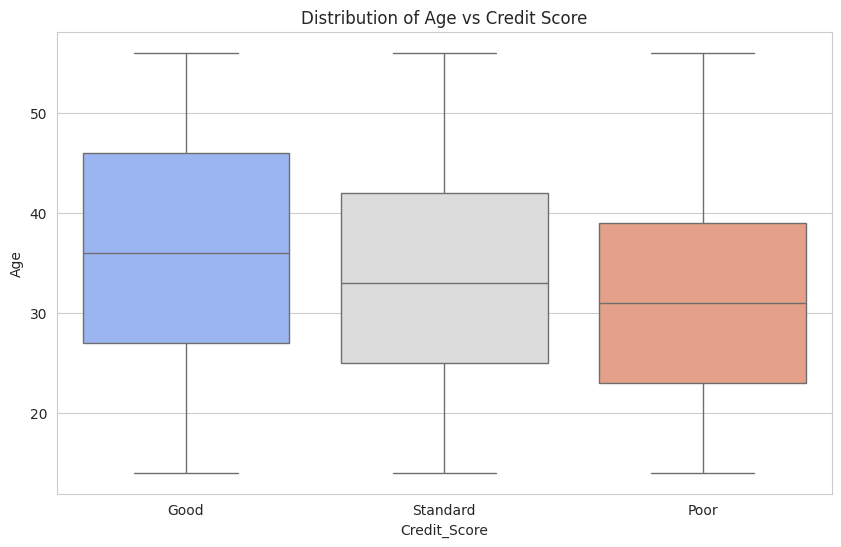

In [20]:
# 1. Age vs Credit Score Distribution
plt.figure(figsize=figsize)
sns.boxplot(x="Credit_Score", y="Age", data=df, palette="coolwarm")
plt.title("Distribution of Age vs Credit Score")
plt.show()

1. Age vs Credit Score

Insight:

Younger individuals (18-30) have a wider spread of credit scores, with a higher percentage in the "Poor" category.

Older individuals (40+) tend to have better credit scores, likely due to longer credit histories and responsible financial behavior.

Positive Impact for Business:

Paisabazaar can create targeted financial literacy programs for younger individuals, educating them on improving credit scores.

Loan products can be customized based on age groups, offering flexible terms to younger customers to improve their credit behavior.

### 2. Annual Income vs Credit Score

<ipython-input-21-11927ebc327a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Annual_Income", data=df, palette="coolwarm")


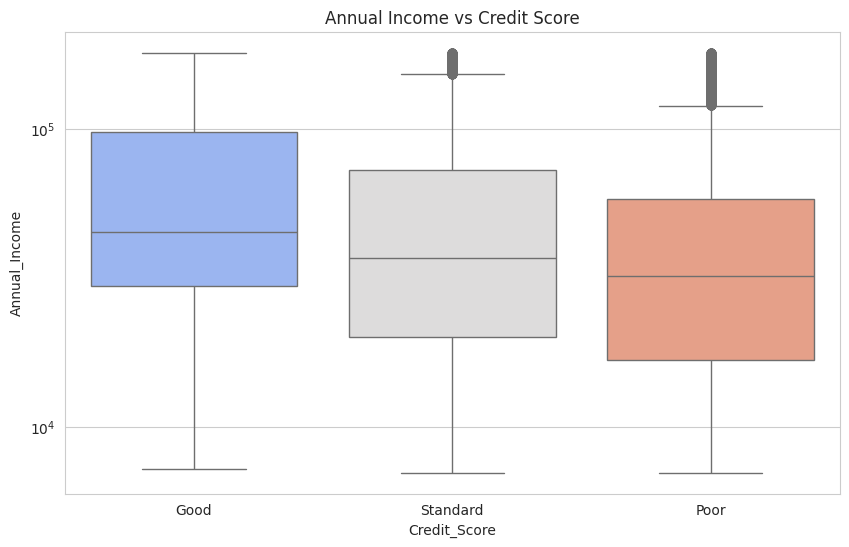

In [21]:
# 2. Annual Income vs Credit Score
plt.figure(figsize=figsize)
sns.boxplot(x="Credit_Score", y="Annual_Income", data=df, palette="coolwarm")
plt.title("Annual Income vs Credit Score")
plt.yscale("log")  # Log scale for better visibility
plt.show()

Insight:

Individuals with higher annual income generally have better credit scores.
However, some high-income individuals still fall into the "Poor" credit category, possibly due to poor financial management.

Positive Impact for Business:

Credit advisory services can be offered to high-income individuals with poor scores, helping them improve financial habits.

Lenders can introduce premium financial products for high-income customers with good credit scores.

### Monthly Salary vs Credit Score

<ipython-input-22-cd27c040c752>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Monthly_Inhand_Salary", data=df, palette="coolwarm")


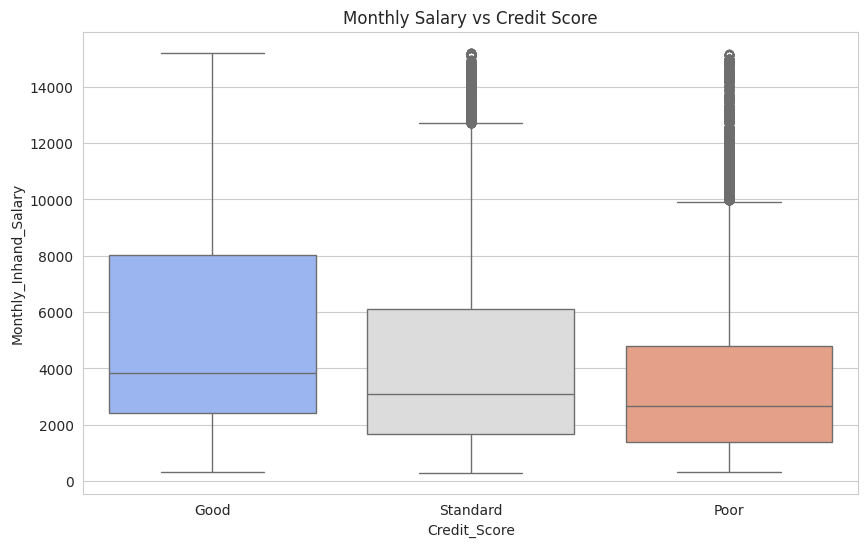

In [22]:
# 3. Monthly Salary vs Credit Score
plt.figure(figsize=figsize)
sns.boxplot(x="Credit_Score", y="Monthly_Inhand_Salary", data=df, palette="coolwarm")
plt.title("Monthly Salary vs Credit Score")
plt.show()



Insight:

Higher monthly salaries are associated with better credit scores.
A significant number of low-salary individuals fall into the “Poor” category, indicating difficulty in managing credit.

Positive Impact for Business:

Personalized financial recommendations can help low-salary individuals build a better credit profile.
Banks can introduce small loan products with structured repayment plans to improve creditworthiness.

### Number of Bank Accounts vs Credit Score

<ipython-input-23-1eb072926d9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Num_Bank_Accounts", data=df, palette="coolwarm")


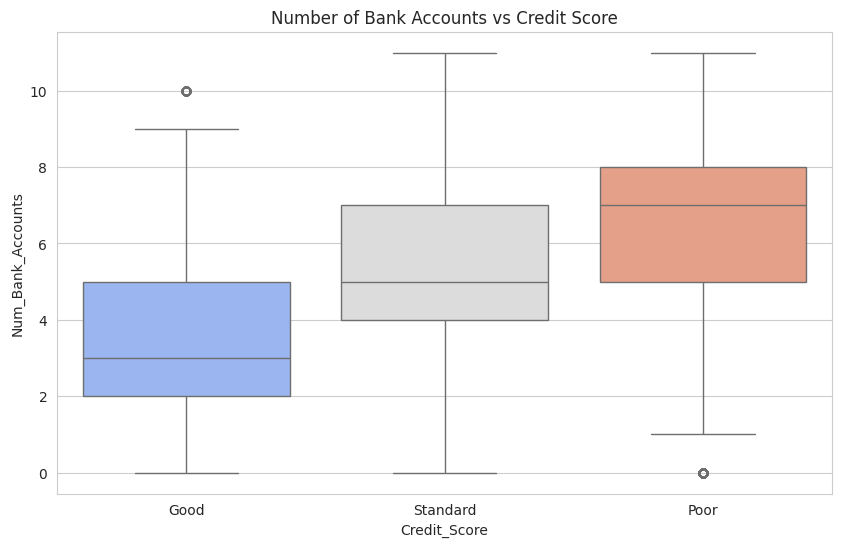

In [23]:
# 4. Number of Bank Accounts vs Credit Score
plt.figure(figsize=figsize)
sns.boxplot(x="Credit_Score", y="Num_Bank_Accounts", data=df, palette="coolwarm")
plt.title("Number of Bank Accounts vs Credit Score")
plt.show()

Insight:

Customers with multiple bank accounts tend to have slightly better credit scores.

Too few or too many accounts might indicate financial mismanagement, especially in lower credit score groups.

Positive Impact for Business:

Paisabazaar can recommend optimal banking strategies, such as maintaining a balanced number of accounts.

Credit monitoring services can be offered to individuals with excessive bank accounts to manage finances better.

### Credit Score Distribution

<ipython-input-25-0cfc6b3fca94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score", data=df, palette="coolwarm", order=df["Credit_Score"].value_counts().index)


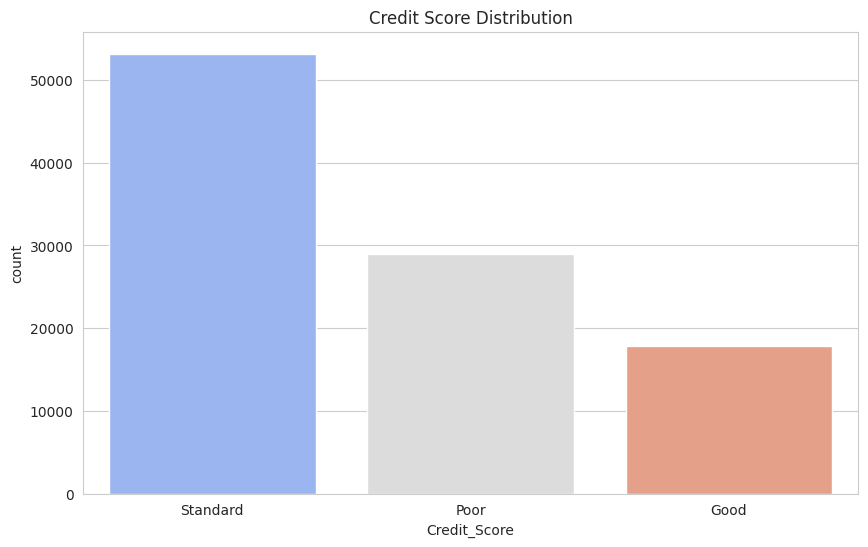

In [25]:
# 5. Credit Score Distribution
plt.figure(figsize=figsize)
sns.countplot(x="Credit_Score", data=df, palette="coolwarm", order=df["Credit_Score"].value_counts().index)
plt.title("Credit Score Distribution")
plt.show()

Insight:

The majority of customers fall in the "Standard" credit score category, with fewer in "Good" and "Poor."

Positive Impact for Business:

Paisabazaar can target "Standard" score customers with financial improvement plans to push them into the "Good" category.

Special loan offers or reward programs can be designed for “Good” credit score individuals to encourage long-term engagement.

### Payment Behaviour Distribution

<ipython-input-24-3902fc7a12f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Payment_Behaviour", data=df, palette="coolwarm", order=df["Payment_Behaviour"].value_counts().index)


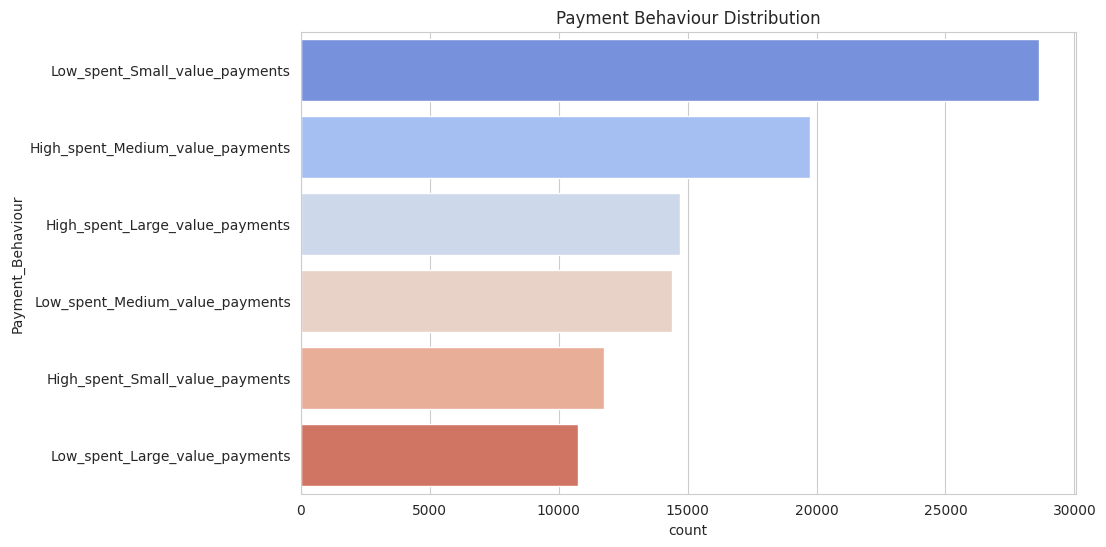

In [24]:
# 6. Payment Behaviour Distribution
plt.figure(figsize=figsize)
sns.countplot(y="Payment_Behaviour", data=df, palette="coolwarm", order=df["Payment_Behaviour"].value_counts().index)
plt.title("Payment Behaviour Distribution")
plt.show()

Insight:

Most individuals fall under categories like "Low spending and regular payments" or "High spending and occasional delays."
Late payments correlate with poor credit scores.

Positive Impact for Business:

Customers with irregular payment behaviors can be targeted with automated reminders and credit coaching.
Personalized loan repayment plans can help individuals avoid late payments.


### Monthly EMI vs Credit Utilization Ratio

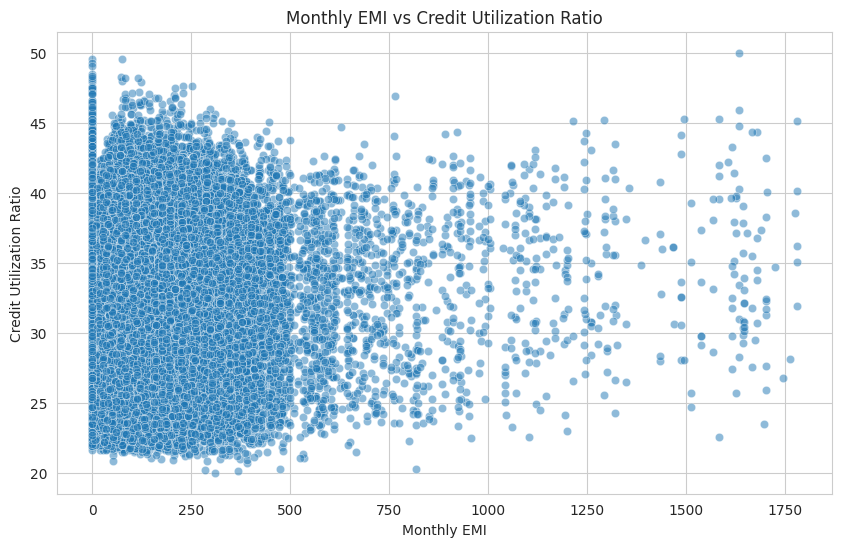

In [26]:
# 7. Monthly EMI vs Credit Utilization Ratio
plt.figure(figsize=figsize)
sns.scatterplot(x="Total_EMI_per_month", y="Credit_Utilization_Ratio", data=df, alpha=0.5)
plt.title("Monthly EMI vs Credit Utilization Ratio")
plt.xlabel("Monthly EMI")
plt.ylabel("Credit Utilization Ratio")
plt.show()



Insight:

A high credit utilization ratio is linked to higher EMI payments, which may signal financial stress.
Customers with low EMI payments generally have lower credit utilization and better scores.

Positive Impact for Business:

Lenders can monitor high EMI customers for potential defaults and offer restructuring options.
Paisabazaar can provide spending control tips to customers with high credit utilization.

### Outstanding Debt vs Credit Score

<ipython-input-27-342db6e3a855>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Outstanding_Debt", data=df, palette="coolwarm")


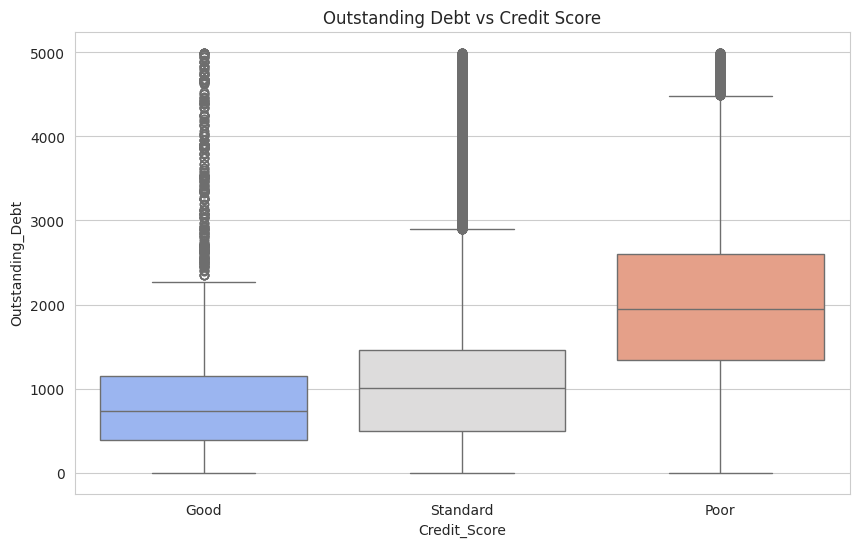

In [27]:
# 8. Outstanding Debt vs Credit Score
plt.figure(figsize=figsize)
sns.boxplot(x="Credit_Score", y="Outstanding_Debt", data=df, palette="coolwarm")
plt.title("Outstanding Debt vs Credit Score")
plt.show()

Insight:

Individuals with high outstanding debt tend to have poor credit scores.
Those with low outstanding debt are more likely to have good credit scores.

Positive Impact for Business:

Debt consolidation options can be recommended to customers struggling with high outstanding debt.

Personalized credit counseling can help customers manage debt repayment effectively.

### Number of Delayed Payments vs Credit Score

<ipython-input-28-1b1031781c75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Num_of_Delayed_Payment", data=df, palette="coolwarm")


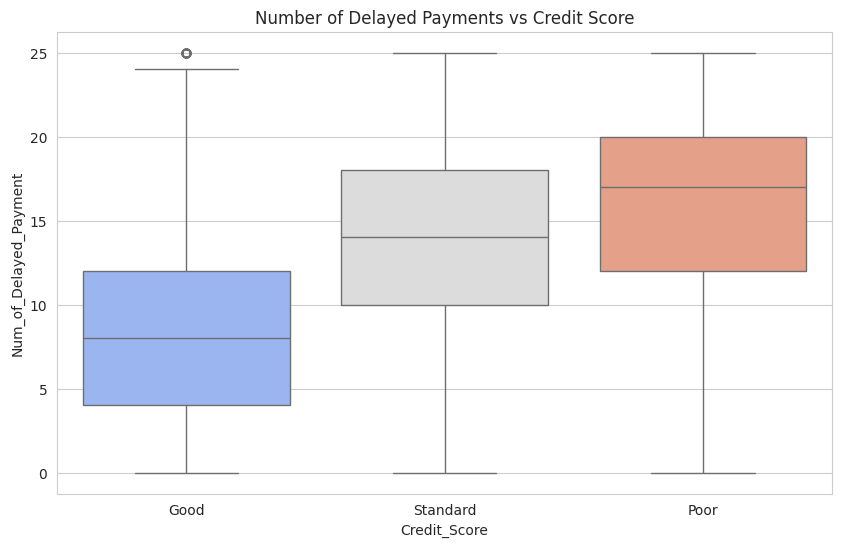

In [28]:
# 9. Number of Delayed Payments vs Credit Score
plt.figure(figsize=figsize)
sns.boxplot(x="Credit_Score", y="Num_of_Delayed_Payment", data=df, palette="coolwarm")
plt.title("Number of Delayed Payments vs Credit Score")
plt.show()

Insight:

Frequent delayed payments are strongly correlated with lower credit scores.
Customers with zero or minimal delays tend to have good credit scores.

Positive Impact for Business:

Banks can offer autopay or scheduled payment options to customers with a history of delayed payments.

Educational content on the importance of timely payments can be provided to improve customer behavior.

### Delay from Due Date vs Credit Score

<ipython-input-29-da9bb92ba5d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Delay_from_due_date", data=df, palette="coolwarm")


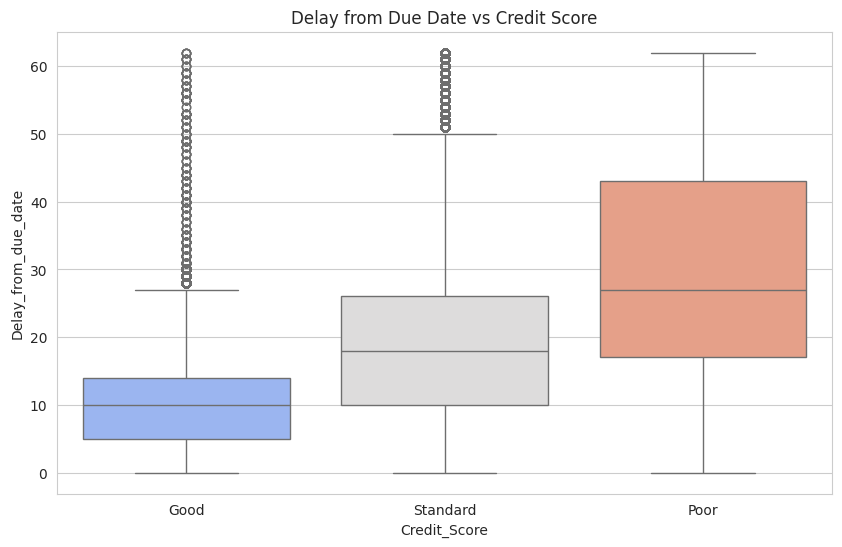

In [29]:
# 10. Delay from Due Date vs Credit Score
plt.figure(figsize=figsize)
sns.boxplot(x="Credit_Score", y="Delay_from_due_date", data=df, palette="coolwarm")
plt.title("Delay from Due Date vs Credit Score")
plt.show()

Insight:

Longer delays in payments significantly reduce credit scores.
Customers who delay payments by more than 30 days mostly fall into the "Poor" category.

Positive Impact for Business:

Introducing flexible payment schedules for customers with a history of delays.

Offering rewards or incentives for on-time payments to encourage responsible financial behavior.

Overall Business Benefits from These Insights

✅ Better Customer Targeting: Paisabazaar can offer tailored financial advice and loan products based on customer segments.

✅ Reduced Loan Defaults: Identifying high-risk customers early allows banks to take preventive actions.

✅ Higher Customer Engagement: Financial literacy programs and credit improvement strategies keep customers engaged.

✅ Improved Financial Inclusion: Low-income and poor-score individuals can receive structured help to enter the formal credit system.

### Conclusion

The exploratory data analysis (EDA) of Paisabazaar’s credit score dataset provides valuable insights into the factors influencing an individual’s creditworthiness. By examining key relationships between demographic, financial, and behavioral variables, we can identify patterns that impact credit scores and uncover actionable strategies to enhance customer engagement, financial planning, and risk management.

### Key Findings & Business Implications

Demographic Factors (Age, Income, and Salary) Influence Credit Scores

Younger individuals tend to have a more varied credit score distribution, often skewing towards poor scores due to limited credit history and financial experience.
Higher-income individuals generally have better credit scores, though some still fall into poor categories due to spending and repayment habits.
Monthly salary strongly correlates with credit score, highlighting the importance of stable income for creditworthiness.

✅ Business Impact: Personalized credit-building programs and tailored financial products for younger and lower-income individuals can improve financial literacy and credit health.
Credit Utilization and Debt Levels Are Key Risk Indicators

High outstanding debt and high credit utilization ratios are strong predictors of poor credit scores.
Customers with excessive EMI commitments often struggle with credit management, leading to financial stress.

✅ Business Impact: Debt restructuring, credit limit management advice, and proactive risk monitoring can help mitigate default risks.
Banking and Payment Behavior Shape Credit Health

Customers with frequent delayed payments and long payment delays are more likely to have poor credit scores.
Multiple bank accounts generally correlate with better credit scores, possibly due to financial discipline and diverse credit lines.

✅ Business Impact: Automated payment reminders, financial counseling, and reward programs for timely payments can encourage better credit habits.
Overall Credit Score Distribution Shows Opportunities for Improvement

Most customers fall in the “Standard” credit score category, with fewer in the “Good” range, indicating room for credit optimization.

✅ Business Impact: Targeting "Standard" score customers with credit improvement strategies can move them into the “Good” category, opening access to premium financial products.

### Strategic Recommendations for Paisabazaar

🔹 Personalized Financial Planning - Offering customized credit improvement plans based on income, spending habits, and payment behavior.

🔹 Early Risk Detection & Intervention - Identifying customers with high outstanding debt, high credit utilization, and frequent delays for proactive financial guidance.

🔹 Financial Education & Credit Awareness - Developing content and advisory services to educate customers on improving credit scores.

🔹 Innovative Credit Solutions - Introducing flexible loan repayment options, automated reminders, and structured EMI plans to support better credit management.

🔹 Enhanced Customer Segmentation - Utilizing these insights to create targeted loan and credit card offers tailored to different credit score categories.

### Final Thought

By leveraging these insights, Paisabazaar can enhance its credit assessment processes, reduce loan default risks, and offer more personalized financial solutions to its customers. This data-driven approach not only improves customer financial health but also strengthens Paisabazaar’s position as a trusted financial services provider in the market.